#Face Recognition (PCA dimensionality reduction and SVM)

In [61]:
'''
credited: http://scipy-lectures.github.io/advanced/scikit-learn/
and
scikit-learn.org
'''
# Downloading data
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=100, resize=0.5)

In [62]:
# identifying image shape for plotting
# m : height
# n : width 
n_samples, m, n = lfw_people.images.shape
X = lfw_people.data
n_features = X.shape[1]

# for prediction
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

# about dataset
print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1140
n_features: 2914
n_classes: 5


In [63]:
# spliting data into 2 parts i.e. training and test dataset 
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [64]:
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
from sklearn.decomposition import RandomizedPCA

n_components = 150
print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
pca = RandomizedPCA(n_components=n_components, whiten=True).fit(X_train)

Extracting the top 150 eigenfaces from 855 faces


In [65]:
eigenfaces = pca.components_.reshape((n_components, m, n))
print("Projecting the input data on the eigenfaces orthonormal basis")
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

Projecting the input data on the eigenfaces orthonormal basis


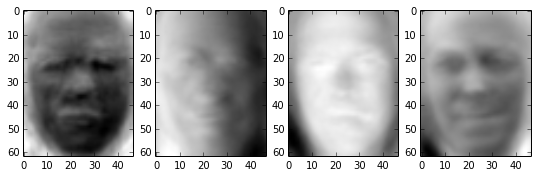

In [66]:
import matplotlib.pyplot as pl
%matplotlib inline
# example: eigen face
pl.figure(figsize=(1.8 * 4, 2.4 * 1))
pl.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for i in range(1 * 4):
    pl.subplot(1, 4, i + 1)
    pl.imshow(eigenfaces[i].reshape((m, n)), cmap=plt.cm.gray_r)

In [67]:
# SVM classification model to train
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
print("Fitting the classifier to the training set")
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='auto'), param_grid)
clf = clf.fit(X_train_pca, y_train)
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='auto', coef0=0.0, degree=3,
  gamma=0.005, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False)


In [68]:
# Evaluating Quatitatively
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print("Predicting people's names on the test set")
y_pred = clf.predict(X_test_pca)
print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

Predicting people's names on the test set
                   precision    recall  f1-score   support

     Colin Powell       0.92      0.90      0.91        61
  Donald Rumsfeld       0.93      0.79      0.85        33
    George W Bush       0.88      0.96      0.92       132
Gerhard Schroeder       1.00      0.79      0.88        28
       Tony Blair       0.83      0.81      0.82        31

      avg / total       0.90      0.89      0.89       285

[[ 55   0   5   0   1]
 [  1  26   5   0   1]
 [  3   1 127   0   1]
 [  1   1   2  22   2]
 [  0   0   6   0  25]]


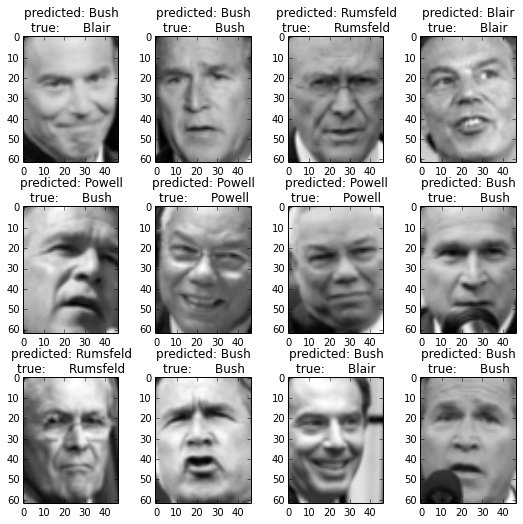

In [69]:
# Classification Results

def plot_gallery(images, titles, m, n, n_row=3, n_col=4):
    pl.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    pl.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        pl.subplot(n_row, n_col, i + 1)
        pl.imshow(images[i].reshape((m, n)), cmap=pl.cm.gray)
        pl.title(titles[i], size=12)


# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, m, n)

pl.show()

Extracting the top 5 eigenfaces from 855 faces
Projecting the input data on the eigenfaces orthonormal basis
Fitting the classifier to the training set
Best estimator found by grid search:
SVC(C=100000.0, cache_size=200, class_weight='auto', coef0=0.0, degree=3,
  gamma=0.1, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False)
Predicting people's names on the test set
                   precision    recall  f1-score   support

     Colin Powell       0.31      0.52      0.39        56
  Donald Rumsfeld       0.17      0.23      0.20        31
    George W Bush       0.50      0.44      0.47       125
Gerhard Schroeder       0.06      0.03      0.04        35
       Tony Blair       0.27      0.18      0.22        38

      avg / total       0.34      0.35      0.34       285

[[29  7 14  1  5]
 [14  7  7  2  1]
 [33 16 55 10 11]
 [ 9  6 17  1  2]
 [ 9  4 16  2  7]]


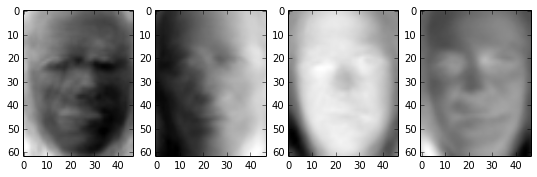

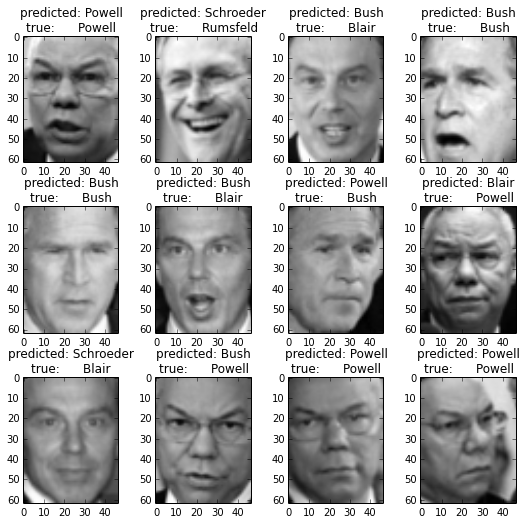

In [70]:
# spliting data into 2 parts i.e. training and test dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 5 #REDUCED NUMBER OF COMPONENTS TO KEEP
print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
pca = RandomizedPCA(n_components=n_components, whiten=True).fit(X_train)

eigenfaces = pca.components_.reshape((n_components, m, n))
print("Projecting the input data on the eigenfaces orthonormal basis")
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# example: eigen face
pl.figure(figsize=(1.8 * 4, 2.4 * 1))
pl.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for i in range(1 * 4):
    pl.subplot(1, 4, i + 1)
    pl.imshow(eigenfaces[i].reshape((m, n)), cmap=plt.cm.gray_r)
    
# SVM
print("Fitting the classifier to the training set")
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='auto'), param_grid)
clf = clf.fit(X_train_pca, y_train)
print("Best estimator found by grid search:")
print(clf.best_estimator_)

# Evaluation
print("Predicting people's names on the test set")
y_pred = clf.predict(X_test_pca)
print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

#plotting
prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, m, n)

pl.show()

Extracting the top 300 eigenfaces from 855 faces
Projecting the input data on the eigenfaces orthonormal basis
Fitting the classifier to the training set
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='auto', coef0=0.0, degree=3,
  gamma=0.001, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False)
Predicting people's names on the test set
                   precision    recall  f1-score   support

     Colin Powell       0.75      0.90      0.82        52
  Donald Rumsfeld       0.82      0.79      0.81        29
    George W Bush       0.90      0.90      0.90       138
Gerhard Schroeder       1.00      0.73      0.84        26
       Tony Blair       0.81      0.75      0.78        40

      avg / total       0.86      0.85      0.85       285

[[ 47   2   2   0   1]
 [  3  23   2   0   1]
 [  9   2 124   0   3]
 [  0   1   4  19   2]
 [  4   0   6   0  30]]


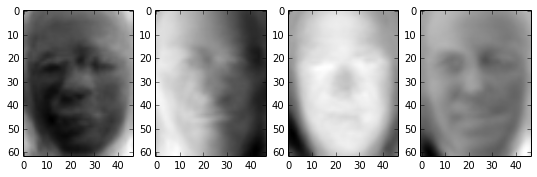

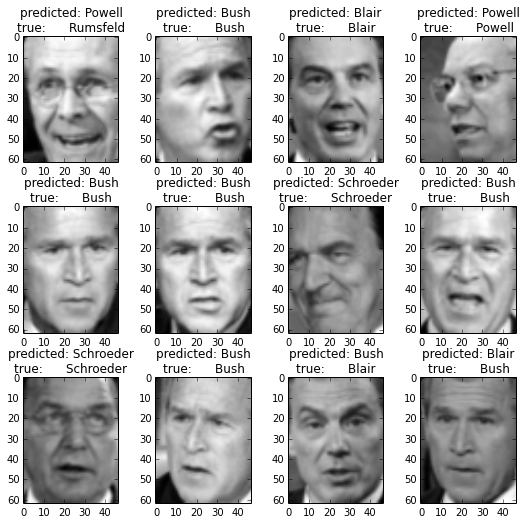

In [71]:
# spliting data into 2 parts i.e. training and test dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 300 #More NUMBER OF COMPONENTS TO KEEP
print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
pca = RandomizedPCA(n_components=n_components, whiten=True).fit(X_train)

eigenfaces = pca.components_.reshape((n_components, m, n))
print("Projecting the input data on the eigenfaces orthonormal basis")
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# example: eigen face
pl.figure(figsize=(1.8 * 4, 2.4 * 1))
pl.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for i in range(1 * 4):
    pl.subplot(1, 4, i + 1)
    pl.imshow(eigenfaces[i].reshape((m, n)), cmap=plt.cm.gray_r)
    
# SVM
print("Fitting the classifier to the training set")
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='auto'), param_grid)
clf = clf.fit(X_train_pca, y_train)
print("Best estimator found by grid search:")
print(clf.best_estimator_)

# Evaluation
print("Predicting people's names on the test set")
y_pred = clf.predict(X_test_pca)
print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

#plotting
prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, m, n)

pl.show()